In [5]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_datareader.data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [6]:
sns.set()

In [22]:
#set the starting date to be 2020.01.01.
# We will be looking at TSM and INTC stocks
start = datetime(2020, 1, 1)
TSM = yf.download('TSM', start=start)
INTC = yf.download('INTC', start=start)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
TSM.shape

(1278, 5)

In [26]:
INTC.shape

(1278, 5)

In [28]:
TSM.columns = TSM.columns.droplevel('Ticker')  # Remove the 'Ticker' level (TSM)
TSM = TSM.rename_axis(None, axis=1)  # Remove the column names ('Price', 'Ticker')

INTC.columns = INTC.columns.droplevel('Ticker')  # Remove the 'Ticker' level (INTC)
INTC = INTC.rename_axis(None, axis=1)  # Remove the column names ('Price', 'Ticker')

In [30]:
TSM.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,54.504333,54.576956,54.104899,54.104899,8432600
2020-01-03,52.706875,53.542049,52.688718,53.532973,10546400
2020-01-06,52.098652,52.370991,51.862625,52.289289,8897200
2020-01-07,52.942902,53.197085,51.508579,52.153116,7444300
2020-01-08,53.333260,53.542053,52.752268,52.824890,5381500


In [32]:
TSM.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,54.504333,54.576956,54.104899,54.104899,8432600
2020-01-03,52.706875,53.542049,52.688718,53.532973,10546400
2020-01-06,52.098652,52.370991,51.862625,52.289289,8897200
2020-01-07,52.942902,53.197085,51.508579,52.153116,7444300
2020-01-08,53.333260,53.542053,52.752268,52.824890,5381500


# Time Series Visualization

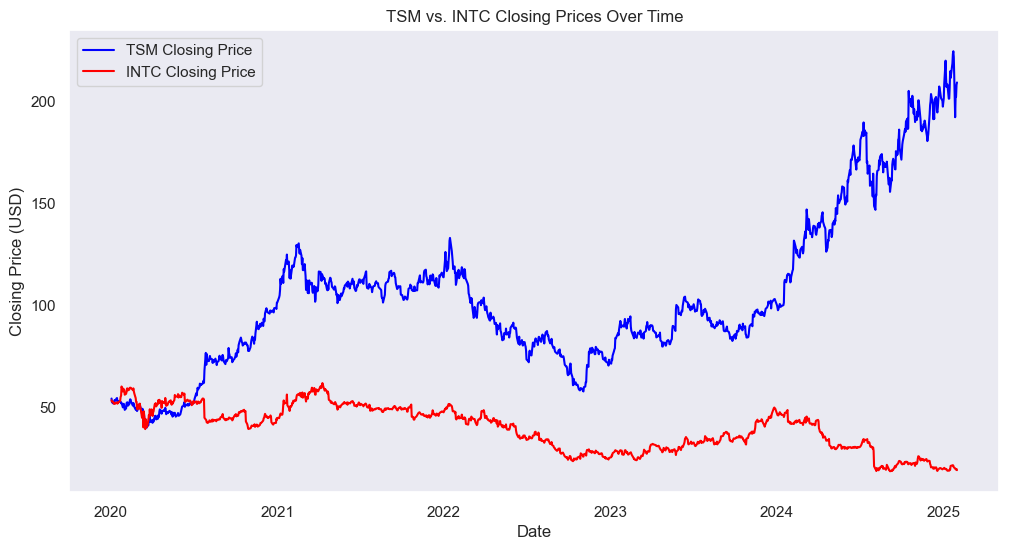

In [34]:
# Plot Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(TSM.index, TSM['Close'], label='TSM Closing Price', color='blue')
plt.plot(INTC.index, INTC['Close'], label='INTC Closing Price', color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.title('TSM vs. INTC Closing Prices Over Time')
plt.legend()
plt.grid()
plt.show()

In [36]:
# Calculate Moving Averages (50-day and 200-day)
TSM['50_MA'] = TSM['Close'].rolling(window=50).mean()
TSM['200_MA'] = TSM['Close'].rolling(window=200).mean()
INTC['50_MA'] = INTC['Close'].rolling(window=50).mean()
INTC['200_MA'] = INTC['Close'].rolling(window=200).mean()

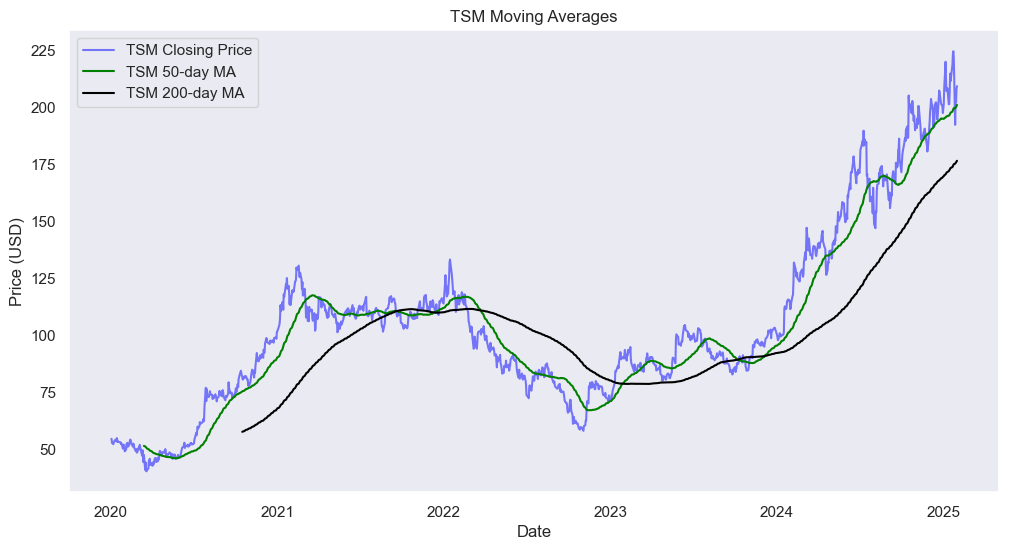

In [40]:
# Plot Moving Averages
# TSM Moving Average
plt.figure(figsize=(12, 6))
plt.plot(TSM.index, TSM['Close'], label='TSM Closing Price', color='blue', alpha=0.5)
plt.plot(TSM.index, TSM['50_MA'], label='TSM 50-day MA', color='green')
plt.plot(TSM.index, TSM['200_MA'], label='TSM 200-day MA', color='black')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('TSM Moving Averages')
plt.legend()
plt.grid()
plt.show()

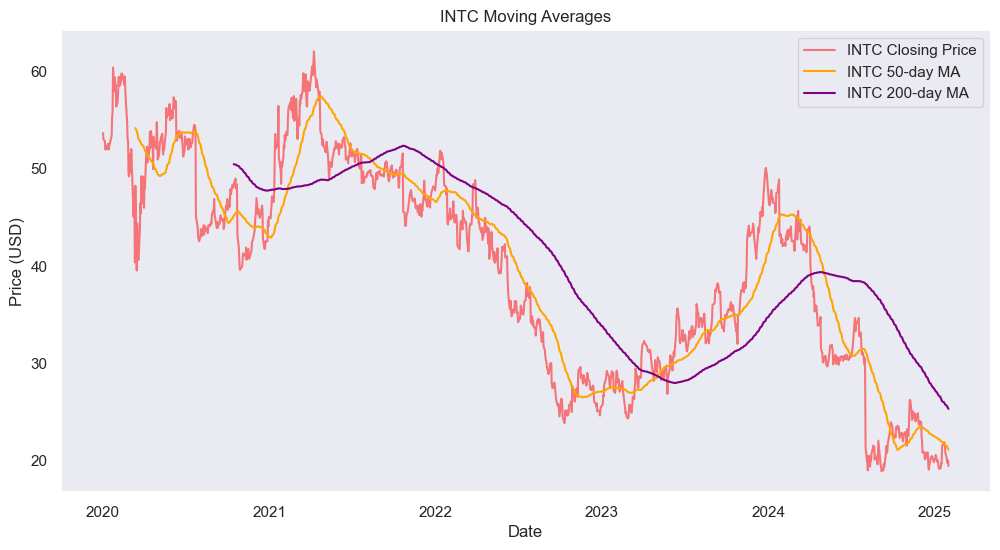

In [42]:
# INTC Moving Average
plt.figure(figsize=(12, 6))
plt.plot(INTC.index, INTC['Close'], label='INTC Closing Price', color='red', alpha=0.5)
plt.plot(INTC.index, INTC['50_MA'], label='INTC 50-day MA', color='orange')
plt.plot(INTC.index, INTC['200_MA'], label='INTC 200-day MA', color='purple')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('INTC Moving Averages')
plt.legend()
plt.grid()
plt.show()

In [44]:
# Calculate Rolling Volatility (30-day standard deviation of daily returns)
TSM['Daily_Return'] = TSM['Close'].pct_change()
INTC['Daily_Return'] = INTC['Close'].pct_change()
TSM['30D_Volatility'] = TSM['Daily_Return'].rolling(window=30).std()
INTC['30D_Volatility'] = INTC['Daily_Return'].rolling(window=30).std()

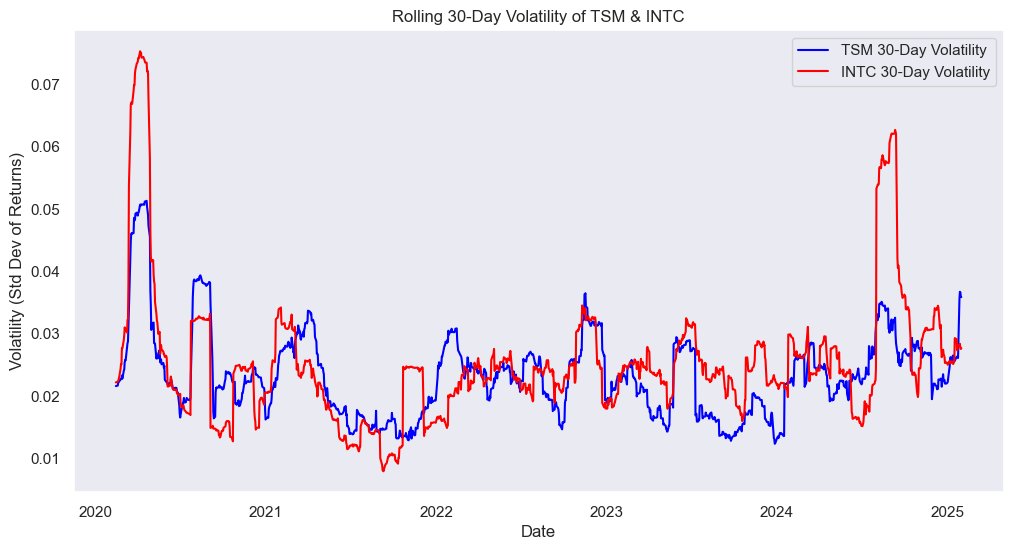

In [46]:
# Plot Rolling Volatility
plt.figure(figsize=(12, 6))
plt.plot(TSM.index, TSM['30D_Volatility'], label='TSM 30-Day Volatility', color='blue')
plt.plot(INTC.index, INTC['30D_Volatility'], label='INTC 30-Day Volatility', color='red')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev of Returns)')
plt.title('Rolling 30-Day Volatility of TSM & INTC')
plt.legend()
plt.grid()
plt.show()

# Correlation Analysis

In [50]:
correlation_matrix = pd.concat([TSM['Daily_Return'], INTC['Daily_Return']], axis=1).dropna()
correlation_matrix.columns = ['TSM', 'INTC']

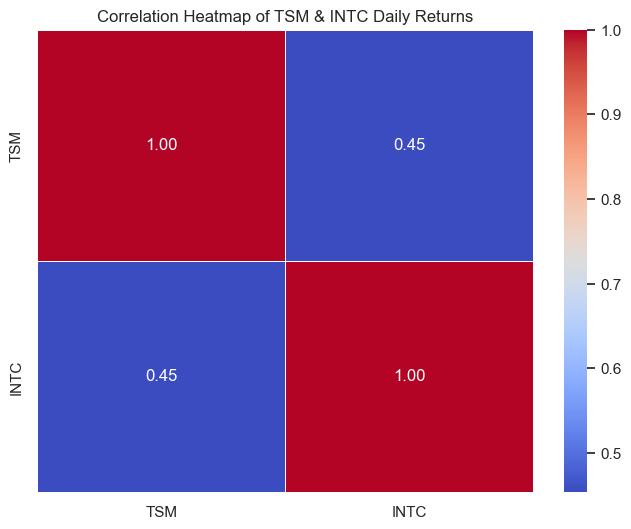

In [54]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of TSM & INTC Daily Returns')
plt.show()

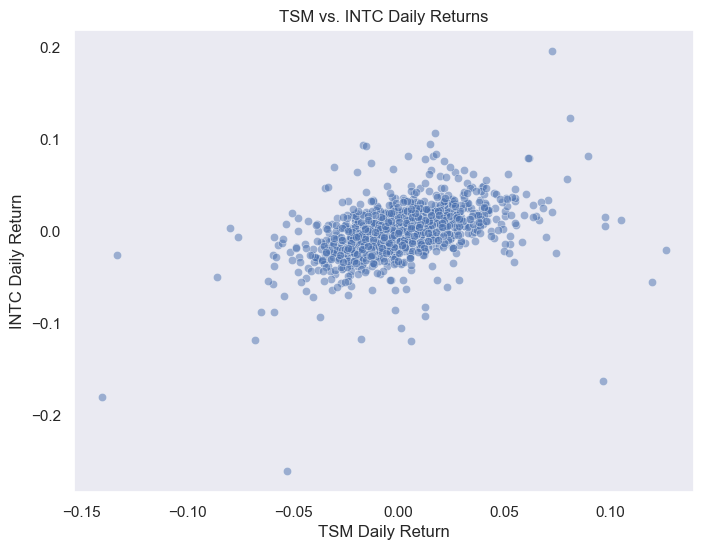

In [56]:
# Scatter Plot of Daily Returns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=correlation_matrix['TSM'], y=correlation_matrix['INTC'], alpha=0.5)
plt.xlabel('TSM Daily Return')
plt.ylabel('INTC Daily Return')
plt.title('TSM vs. INTC Daily Returns')
plt.grid()
plt.show()